# Hyperparameters

The model itself will determine the optimal parameters. In the case of linear regression, the parameters are the model coefficients for slope and interceps. In polynomial regression it is the polynomial coefficients. In neural networks, the model parameters are the weights and biases. It is literally the job of the algorithm to optimize for the best parameters.

Hyperparameters, on the other hand, are those types of parameters that the model does not optimize. You can think of parameters as sitting inside the model, while hyperparameters sit outside the model. Hyperparameters need to be found empirically through cross validation. Hyperparameters can include the learning rate, or the structure of the neural network (feed forward, etc).


## Network Architecture as a Hyperparameter
The biggest strength of neural networks is the freedom for them to assume different structures of topologies. 
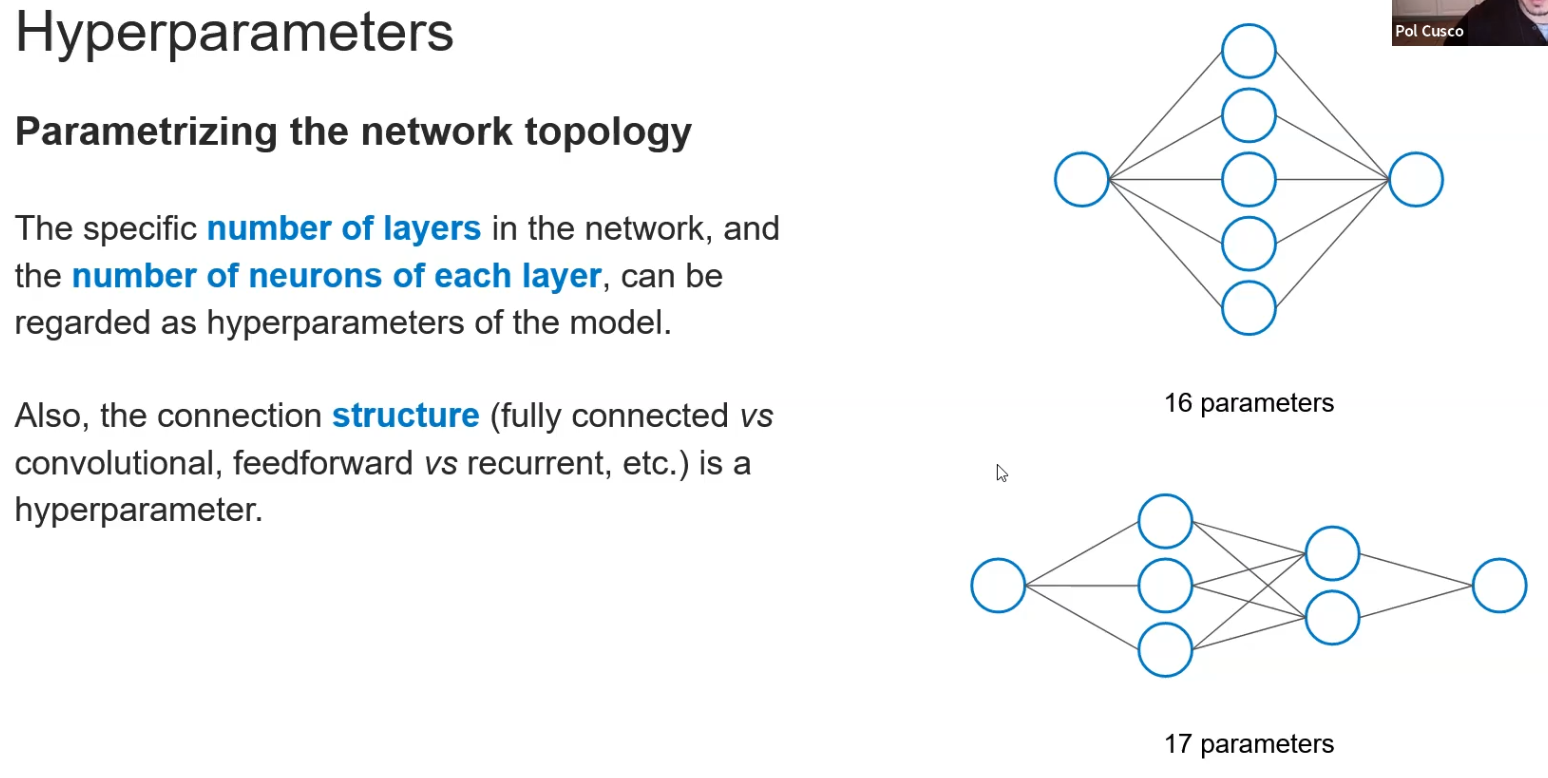

In the case of testing different network topologies, it is not as simple as iteratively testing different values (as was done for optimising k in kNN). To test different network architectures we need to actually build them ourselves. You could however crate an automated model building tool that could test different architectures, but remember that bigger models require larger computational capacity and that recursively testing large models can be a headache. Also recall that the larger the network, the larger its capacity to learn complex problems

Network complexity is typically proportional to the number of parameters that it has and that can be altered. Regarding the two networks imageg above, both have a similar number of parameters. The first has 5x2 weights and 6 biases (5 x middle layer + output). Despite having a similar number of parameters, they are liekly very different networks with different abilities. It has been shown that depper networks (those with more hidden layers) generally perform better and are more capable of learning complex behaviour. As such, we would expect the second model in the above image to generally have better performance. 



## Other Hyperparameters
The other hyperparameters are obviously specific to the type of models being employed. We generally have the following:
- Step size
- Batch size
- Dropout rate
- Weight decay
-- L<sub>1</sub>
-- L<sub>2</sub>



### Step Size / Learning Rate
The magnitude by which we change the weights in gradient descent is proportional to the gradient but also to the step size. Step size directly affects the rate at which the newtwork will approach the optima. You want this to be as fast as possible, but steps that are too large will cause to to overshoot and sometimes oscillate infinitely. Smaller steps require more iterations and thus more computational power. Too large a step size can cause your model to diverge! This is because the gradient may get larger as the model gets further from the optima, which leads to even larger step sizes due to the weight update equation!
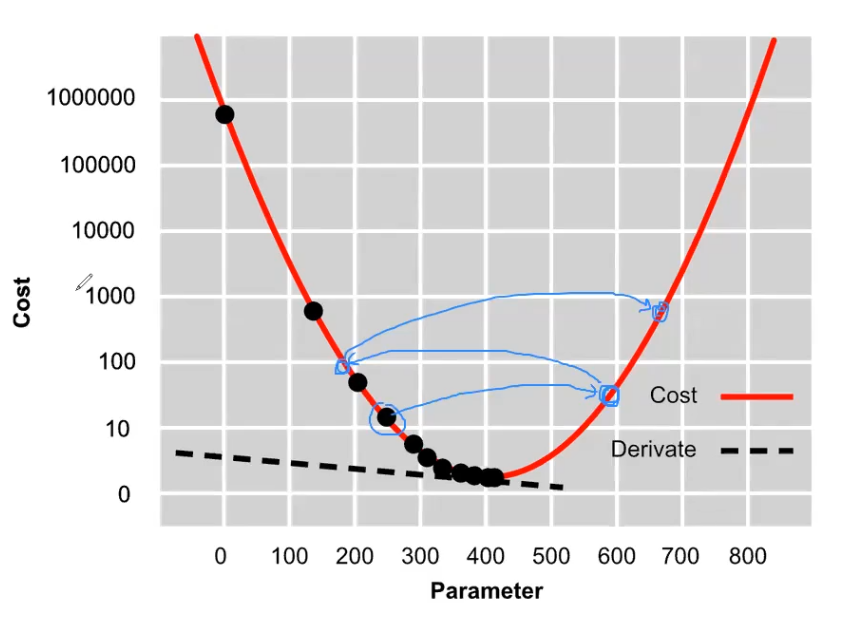



### Batch Size
Recall that the nomenclature here can be confusing. 
- Training on the entire dataset is called BATCH learning.
- Training with individual samples is called stochastic learning.
- Training with a subset of samples is called mini-batch. The size of the mini-batch is called the batch size. 

Training with a tiny batch size approaches the stochastic outcome and training with a large batch size approaches the batch outcome. Check out the image below, that has TWO parameters being optimised (so imagine depth in 3D) 
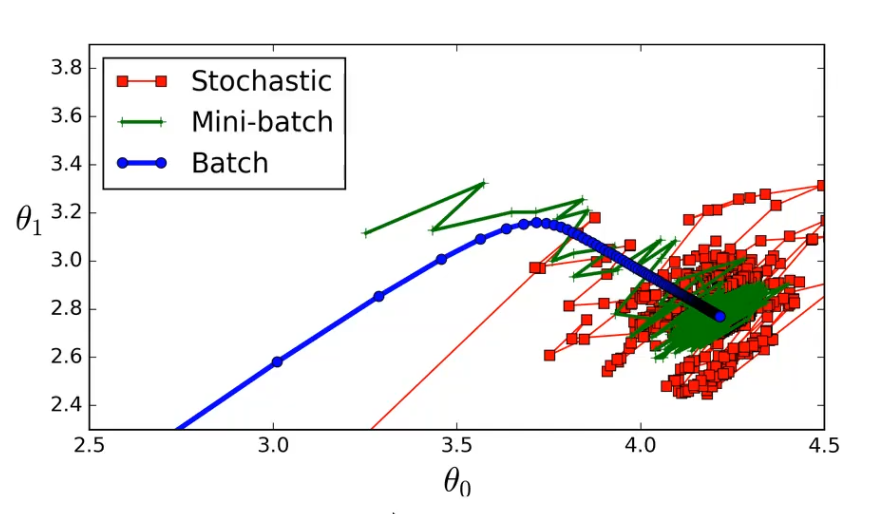

The moral of the story is that with batch (full dataset) you will reach the optimum with fewer iterations and the estimates will be less noisy, BUT your iterations will be trmendously computationally expensive. With stochastic learning your iterations are extremely cheap computationally but you need to make a very large number of them and your steps are noisy. There is a batch size somewhere in the middle that gives a good tradeoff between step noise and computational power. 



### Dropout Rate
This is exclusive to neual networks. Dropout is a process in which a random subset of the weights is TEMPORARILY set to zero. This is done on a pass-by-pass basis. So on each forward pass, a random subset of weights will be set to zero. Why do you do this? It means that on average, across all iterations, the network is actually utilizing all the weights throughout the entire network to some degree. But note that it is not accessing all the weights AT THE SAME TIME. This helps prevent "codependencies" between variables. In a case where a number of input variables are correllated, the network may learn to simply pay attention to one of the variables and disregard the others. Dropout helps s avoid this as it forces the network to learn the true impact of all the variables. The process of dropout can be thought of as some kind of ensemble technique where instead of building new networks we are simply flipping switches. It would have the same effect if we were to build numerous smaller networks and average them. 

Dropout is a regularization technique that decreases overfitting. Counterintutively, the dropout rate is often defined as the number of neurons that we KEEP ACTIVE. Small droput means less active neurons, which ultimately meanst that we will require many more iterations in orde to optimize. 


### Weight Decay
This is another common form of regularization. Generally, if people say "Weight Decay" then are referring to L2 regularization. 

L2 is a penalty that we apply to the weights of the network. With regularization, we don't want the weights of the network to be assuming any extreme values, because this means that the network is relying heavily on specific neurons, which we DON'T WANT as this introduces bias. Applying regularization forces the network to use it's entire architecture by penalizing extreme weights. 

In your optimization problem you will have a cost function. For e.g. regression this would be e.g. MSE. Weight decay is simply adding a penalty term to this cost function in the form of either L1 or L2, or perhaps something else. 

The equations are below. Lambda is another hyperparameter that controls the degree to which the penalty is applied. 
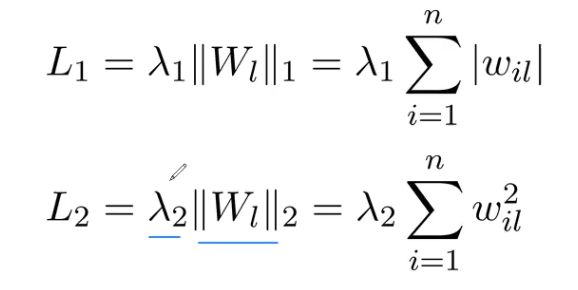

Note how the L1 or L2 is essentially a sum of magnitues raised to a power. As such, if the network develops very large weights then the sum will be larger and the penalty on the network as a whole will increase. In practice, the effects of dropout and L2 are very similar, and in fact they can be applied together if you wish, but better to stick to one or the other. 

Even though L1 and L2 are both essentially a sum of network weights that penalize numbers larger than zero, they have VERY different effects. 
- L2 tends to bring each element in the weights matrix towards zero and thus has the effect of keeping the weights similar to each other. There is essentially a downward pressure on the weights that keeps the weights somewhat "evenly" distributed. 
- L1 on the other hand has the effect of making the weight matrix sparse: most of the weights will be very close to zero and a few will be very far from zero. L1 thus generally acts as a sort of "feature selection". This can be useful in the input layer but is not useful within the hidden layers as it essentially switches neurons off. 
- You can use both L1 and L2 in combination and have distinct lambdas to control them!
- In linear models the regularization is essentially applied to  the whole set of weights. But in neural networks the weight matricies are for each layer are separate entities! So you can even apply L1 to one layer, L2 to another layer, a combination of both to the next layer, and so on. Not common, but certainly possible!

YOU GENERALLY USE THE SAME LAMBDA ACROSS ALL LAYERS

